In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pylabnet.network.core.generic_server import GenericServer

from pyvisa import VisaIOError, ResourceManager

# from pylabnet.hardware.oscilloscopes.tektronix_tds2004C import Driver
# from pylabnet.network.client_server.tektronix_tds2004C import Client
# from pylabnet.network.client_server.tektronix_tds2004C import Service

from pylabnet.hardware.oscilloscopes.tektronix_dpo2014 import Driver
from pylabnet.network.client_server.tektronix_dpo2014 import Client
from pylabnet.network.client_server.tektronix_dpo2014 import Service

In [2]:
# Instantiate
logger = LogClient(
    host='192.168.50.101', 
    port=38967, 
    module_tag='Tek Scope'
)

In [3]:
# List all connected VISA ressources.
rm = pyvisa.ResourceManager()
rm.list_resources()

('USB0::0x1313::0x8022::M00580034::INSTR',
 'USB0::0x1313::0x8022::M00579698::INSTR',
 'USB0::0x0699::0x0373::C010240::INSTR',
 'TCPIP0::140.247.189.103::inst0::INSTR',
 'TCPIP0::192.168.50.145::inst0::INSTR',
 'TCPIP0::192.168.50.65::inst0::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR')

In [4]:
# Choose ID corresponding to the scope.
usb_address = 'USB0::0x0699::0x0373::C010240::INSTR'

In [5]:
scope = Driver(
    gpib_address=usb_address,
    logger=logger,
)

In [126]:
# Spectrum analyzer server
scope_service = Service()
scope_service.assign_module(module=scope)
scope_service.assign_logger(logger=None)
scope_service_server = GenericServer(
    service=scope_service, 
    host='localhost',
    port=60496
)

In [127]:
# Start Server
scope_service_server.start()

In [6]:
import re
scope = Driver(
    gpib_address=usb_address,
    logger=logger,
)

In [34]:
scope.set_single_run_acq()

In [59]:
scope.device.write('acquire:state on')

18

In [36]:
scope.set_single_run_acq()

In [83]:
scope.device.write("ACQUIRE:STOPAFTER RUNSTop")
scope.device.write('acquire:state on')

18

In [80]:
scope.device.write("ACQUIRE:STOPAFTER SEQUENCE")
scope.device.write('acquire:state on')

18

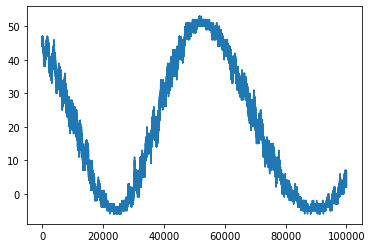

In [84]:
scope.device.write("ACQUIRE:STOPAFTER SEQUENCE")
scope.device.write('acquire:state on')

raw_curve = scope.device.query('curve?')[5:]

# scope.device.write("ACQUIRE:STOPAFTER RUNSTop")
# scope.device.write('acquire:state on')
plt.plot(np.fromstring(raw_curve, dtype=int, sep=','))
plt.show()

In [23]:
scope.read_out_trace('CH4')

{'trace': array([1.3 , 1.3 , 1.26, ..., 2.3 , 2.34, 2.3 ]),
 'ts': array([-0.5     , -0.499992, -0.499984, ...,  0.299976,  0.299984,
         0.299992]),
 'x_unit': 's',
 'y_unit': 'V'}

In [16]:
scope.acquire_single_run()

In [14]:
scope.get_channel_attenuation('CH4')

1.0

In [33]:
scope.device.query('CH4:PRO:GAIN?')

':CH4:PRO:GAIN 500.0000E-3\n'

In [34]:
scope.device.write('CH4:PRO:GAIN 1')

16

In [22]:
scope.reset()

In [7]:
scope.get_timing_scale()

4e-06

In [8]:
res = scope.read_out_trace("CH1")
print(res)

{'trace': array([0.16, 0.16, 0.12, ..., 0.16, 0.12, 0.12]), 'ts': array([-5.0000e-05, -4.9999e-05, -4.9998e-05, ...,  4.9997e-05,
        4.9998e-05,  4.9999e-05]), 'x_unit': 's', 'y_unit': 'V'}


In [9]:
res['ts']

array([-5.0000e-05, -4.9999e-05, -4.9998e-05, ...,  4.9997e-05,
        4.9998e-05,  4.9999e-05])

In [10]:
res['trace']

array([0.16, 0.16, 0.12, ..., 0.16, 0.12, 0.12])

In [11]:
scope.show_trace("CH4")

In [12]:
scope.hide_trace("CH1")

In [13]:
scope.get_trigger_source()

'CH1'

In [14]:
scope.set_trigger_source('CH2')

In [15]:
scope.get_horizontal_position()

50.0

In [19]:
command = ":CH4:PRO"
hor_pos = scope.device.query(f"{command}?")
print(hor_pos)

:CH4:PRO:ID:TYP "No Probe Detected";SER "";:CH4:PRO:GAIN 100.0000E-3;UNI "V";RES 0.0E+0



In [21]:
scope.get_channel_scale('CH1')

1.0

In [18]:
scope.get_channel_attenuation("CH4")

AttributeError: 'NoneType' object has no attribute 'group'

In [20]:
scope.acquire_single_run()